In [13]:
import pandas as pd
import yaml
import random
from datetime import datetime, timedelta

In [14]:
with open("../config.yaml", "r") as m:
    config = yaml.safe_load(m)

df = pd.read_csv(config["input_data"]["marathon_data"],low_memory=False)
df

,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,02:44:53
1,1974,NaN,male,L2,02:46:43
2,1974,NaN,male,L2,02:48:08
3,1974,NaN,male,L,02:48:40
4,1974,NaN,male,L1,02:49:01
...,...,...,...,...,...
884939,2019,GER,male,65,07:12:17
884940,2019,GER,male,75,07:12:30
884941,2019,GER,male,80,07:15:28
884942,2019,USA,male,30,07:19:28


In [37]:
#  Fastest gender by time 
best_row = df.sort_values('TIME').head(20)
best_row[['YEAR', 'GENDER', 'TIME']]

,YEAR,GENDER,TIME
1,2023,female,02:11:53
2,2022,female,02:15:37
0,2024,female,02:16:42
6,2018,female,02:19:25
9,2015,female,02:19:44
3,2021,female,02:20:09
4,2020,female,02:20:14
8,2016,female,02:20:30
5,2019,female,02:20:45
7,2017,female,02:21:13


In [34]:
# Fastest female by time and year
df_fastest = df[[
    "YEAR","GENDER","TIME"]].sort_values("GENDER")
df_fastest

,YEAR,GENDER,TIME
0,2024,female,02:16:42
1,2023,female,02:11:53
2,2022,female,02:15:37
3,2021,female,02:20:09
4,2020,female,02:20:14
5,2019,female,02:20:45
6,2018,female,02:19:25
7,2017,female,02:21:13
8,2016,female,02:20:30
9,2015,female,02:19:44


In [60]:
# Fastest male times in past 10 yrs 
data = {
    "GENDER": ["male", "male", "male", "male", "male", "male", "male","male","male","male"],
    "YEAR": [2024, 2023, 2022,2021, 2020, 2019, 2018, 2017, 2016, 2015],
    "TIME": ["02:03:17", "02:02:42", "02:01:09", "02:01:39", "02:03:32", "02:03:03", "02:04:00", "02:02:57", "02:03:23","02:04:15"]
}

df = pd.DataFrame(data)

current_year = df['YEAR'].max()
males_last_10_years = (df[(df['GENDER'] == 'male') & 
                         (df['YEAR'] >= current_year - 9)]
                      .copy())

#best time by year
males_summary = (males_last_10_years
                .groupby('YEAR')
                .agg(male_count=('GENDER', 'count'),
                     best_time=('TIME', 'min'))
                .reset_index())

print("Males by Year with Best Times in Last 10 Years:")
print(males_summary)

Males by Year with Best Times in Last 10 Years:
   YEAR  male_count best_time
0  2015           1  02:04:15
1  2016           1  02:03:23
2  2017           1  02:02:57
3  2018           1  02:04:00
4  2019           1  02:03:03
5  2020           1  02:03:32
6  2021           1  02:01:39
7  2022           1  02:01:09
8  2023           1  02:02:42
9  2024           1  02:03:17


In [29]:
# Fastest female times in past 10 yrs 
data = {
    "GENDER": ["female", "female", "female", "female", "female", "female", "female", "female", "female", "female"],
    "YEAR": [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
    "TIME": ["02:16:42", "02:11:53", "02:15:37", "02:20:09", "02:20:14", "02:20:45", "02:19:25", "02:21:13", "02:20:30", "02:19:44"]
}

df = pd.DataFrame(data)

current_year = df['YEAR'].max()
females_last_10_years = (df[(df['GENDER'] == 'female') & 
                         (df['YEAR'] >= current_year - 9)]
                      .copy())

# Best time by year
females_summary = (males_last_10_years
                .groupby('YEAR')
                .agg(female_count=('GENDER', 'count'),
                     best_time=('TIME', 'min'))
                .reset_index())

print("Females by Year with Best Times (Last 10 Years):")
print(females_summary)

Females by Year with Best Times (Last 10 Years):
   YEAR  female_count best_time
0  2015             1  02:04:15
1  2016             1  02:03:23
2  2017             1  02:02:57
3  2018             1  02:04:00
4  2019             1  02:03:03
5  2020             1  02:03:32
6  2021             1  02:01:39
7  2022             1  02:01:09
8  2023             1  02:02:42
9  2024             1  02:03:17


In [61]:
def find_fastest_male(dataframe: pd.DataFrame) -> dict:
    
    # Filter for males
    males_df = dataframe[dataframe['GENDER'] == 'male'].copy()
    
    # Convert TIME to datetime for proper comparison
    males_df['TIME_DATETIME'] = pd.to_datetime(males_df['TIME'], format='%H:%M:%S')
    
    # Row with minimum time
    fastest_idx = males_df['TIME_DATETIME'].idxmin()
    fastest_male = males_df.loc[fastest_idx]
    
    return {
        'year': fastest_male['YEAR'],
        'time': fastest_male['TIME'],
        'gender': fastest_male['GENDER']
    }
def analyze_fastest_by_year(dataframe: pd.DataFrame) -> pd.DataFrame:
    
    # Convert TIME to datetime for proper sorting
    df_copy = dataframe.copy()
    df_copy['TIME_DATETIME'] = pd.to_datetime(df_copy['TIME'], format='%H:%M:%S')
    
    # Group by year and find minimum time
    fastest_by_year = (df_copy
                      .groupby('YEAR')
                      .agg(fastest_time=('TIME', 'min'),
                           total_participants=('GENDER', 'count'))
                      .reset_index())
    
    return fastest_by_year

# Data for 10 years
df = generate_marathon_data(10)
print(f"Generated {len(df)} records for 10 years")
print(f"Years covered: {sorted(df['YEAR'].unique())}")

# Find the fastest male overall
fastest_male_overall = find_fastest_male(df)
print(f"FASTEST MALE IN PAST 10 YEARS:")
print(f"Year: {fastest_male_overall['year']}")
print(f"Time: {fastest_male_overall['time']}")

# Show fastest times by year
fastest_by_year = analyze_fastest_by_year(df)
print(f"FASTEST MALE TIMES BY YEAR:")
print(fastest_by_year)



Generated 343 records for 10 years
Years covered: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
FASTEST MALE IN PAST 10 YEARS:
Year: 2017
Time: 02:00:13
FASTEST MALE TIMES BY YEAR:
   YEAR fastest_time  total_participants
0  2015     02:01:44                  41
1  2016     02:09:05                  29
2  2017     02:00:13                  46
3  2018     02:03:02                  23
4  2019     02:01:02                  47
5  2020     02:31:00                  15
6  2021     02:01:07                  18
7  2022     02:02:00                  39
8  2023     02:05:36                  35
9  2024     02:01:21                  50


In [62]:
# Show top 5 fastest times overall
df_with_datetime = df.copy()
df_with_datetime['TIME_DATETIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S')
top_5_fastest = (df_with_datetime
                .nsmallest(5, 'TIME_DATETIME')[['YEAR', 'TIME']]
                .reset_index(drop=True))

print(f"TOP 5 FASTEST MALE TIMES (10 YEARS):")
for idx, row in top_5_fastest.iterrows():
    print(f"{idx + 1}. {row['TIME']} ({row['YEAR']})")


TOP 5 FASTEST MALE TIMES (10 YEARS):
1. 02:00:13 (2017)
2. 02:01:02 (2019)
3. 02:01:07 (2021)
4. 02:01:21 (2024)
5. 02:01:44 (2015)


In [59]:
def female_marathon_data(years_count=10):
   
    data = {"GENDER": [], "YEAR": [], "TIME": []}
    
    # The year range
    start_year = 2015
    end_year = 2024
    
    # Each year loop
    for year in range(start_year, end_year + 1):
        # Participants per year (10-50)
        participants_count = random.randint(10, 50)
        
        for _ in range(participants_count):

            gender = "female"
            
            # Female marathon times (2:30:00 to 5:30:00)
            base_minutes = random.randint(150, 330)
            seconds = random.randint(0, 59)
            time_str = f"{base_minutes//60:02d}:{base_minutes%60:02d}:{seconds:02d}"
            
            # Append data
            data["GENDER"].append(gender)
            data["YEAR"].append(year)
            data["TIME"].append(time_str)
    
    return pd.DataFrame(data)

def find_fastest_female(dataframe: pd.DataFrame) -> dict:
   
    # Convert TIME to datetime for proper comparison
    df_copy = dataframe.copy()
    df_copy['TIME_DATETIME'] = pd.to_datetime(df_copy['TIME'], format='%H:%M:%S')
    
    # Show minimum time
    fastest_idx = df_copy['TIME_DATETIME'].idxmin()
    fastest_female = df_copy.loc[fastest_idx]
    
    return {
        'year': fastest_female['YEAR'],
        'time': fastest_female['TIME'],
        'gender': fastest_female['GENDER']
    }

def female_performance_by_year(dataframe: pd.DataFrame) -> pd.DataFrame:
   

    # Convert TIME to datetime for proper sorting
    df_copy = dataframe.copy()
    df_copy['TIME_DATETIME'] = pd.to_datetime(df_copy['TIME'], format='%H:%M:%S')
    
    # Group by year and calculate statistics
    yearly_stats = (df_copy
                   .groupby('YEAR')
                   .agg(
                       fastest_time=('TIME', 'min'),
                       slowest_time=('TIME', 'max'),
                       total_female_participants=('GENDER', 'count'),
                       average_time=('TIME_DATETIME', lambda x: 
                                   pd.to_datetime(x.mean()).strftime('%H:%M:%S'))
                   )
                   .reset_index())
    
    return yearly_stats

def top_female_performers(dataframe: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:

    df_copy = dataframe.copy()
    df_copy['TIME_DATETIME'] = pd.to_datetime(df_copy['TIME'], format='%H:%M:%S')
    
    # Get top N fastest times
    top_performers = (df_copy
                     .nsmallest(top_n, 'TIME_DATETIME')
                     [['YEAR', 'TIME', 'GENDER']]
                     .reset_index(drop=True))
    
    return top_performers

def analyze_female_trends(dataframe: pd.DataFrame) -> dict:
 
    df_copy = dataframe.copy()
    df_copy['TIME_DATETIME'] = pd.to_datetime(df_copy['TIME'], format='%H:%M:%S')
    df_copy['TIME_MINUTES'] = (df_copy['TIME_DATETIME'].dt.hour * 60 + 
                              df_copy['TIME_DATETIME'].dt.minute + 
                              df_copy['TIME_DATETIME'].dt.second / 60)
    
    # Calculate trends
    yearly_avg = df_copy.groupby('YEAR')['TIME_MINUTES'].mean()
    
    return {
        'best_year': yearly_avg.idxmin(),
        'best_year_avg_time': f"{int(yearly_avg.min()//60):02d}:{int(yearly_avg.min()%60):02d}:00",
        'worst_year': yearly_avg.idxmax(),
        'worst_year_avg_time': f"{int(yearly_avg.max()//60):02d}:{int(yearly_avg.max()%60):02d}:00",
        'total_participants': len(df_copy),
        'years_analyzed': len(yearly_avg)
    }

# Show female-only marathon data
df_females = generate_female_marathon_data(10)
print(f"Generated {len(df_females)} female records for 10 years")
print(f"Years covered: {sorted(df_females['YEAR'].unique())}")
print(f"All participants are: {df_females['GENDER'].unique()}")


# Show the fastest female overall
fastest_female_overall = find_fastest_female(df_females)
print(f"FASTEST FEMALE IN PAST 10 YEARS:")
print(f"Year: {fastest_female_overall['year']}")
print(f"Time: {fastest_female_overall['time']}")


# Female performance by year
female_yearly_stats = analyze_female_performance_by_year(df_females)
print(f"FEMALE PERFORMANCE BY YEAR:")
print(female_yearly_stats.to_string(index=False))


# Get top 5 female performers
top_5_females = get_top_female_performers(df_females, 5)
print(f"TOP 5 FASTEST FEMALE TIMES (10 YEARS):")
for idx, row in top_5_females.iterrows():
    print(f"{idx + 1}. {row['TIME']} ({row['YEAR']})")


# Analyze trends
trends = analyze_female_trends(df_females)
print(f"FEMALE PERFORMANCE TRENDS:")
print(f"Best performing year: {trends['best_year']} (avg: {trends['best_year_avg_time']})")
print(f"Worst performing year: {trends['worst_year']} (avg: {trends['worst_year_avg_time']})")


Generated 341 female records for 10 years
Years covered: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
All participants are: ['female']
FASTEST FEMALE IN PAST 10 YEARS:
Year: 2023
Time: 02:32:01
FEMALE PERFORMANCE BY YEAR:
 YEAR fastest_time slowest_time  total_female_participants average_time
 2015     02:32:12     05:27:04                         46     03:57:34
 2016     02:43:10     05:23:47                         45     04:08:17
 2017     02:35:31     05:27:39                         24     04:13:03
 2018     02:52:06     05:20:39                         25     04:02:31
 2019     02:39:43     05:30:11                         45     03:58:41
 2020     02:40:09     05:24:38                         45     04:09:05
 2021     02:38:13     05:19:26                         13     04:07:55
 2022     02:34:00     05:26:11                         44     04:00:05
 2023     02:3

Generating historical marathon data (1974-2024)...
Generated 130,050 records spanning 50 years

QUESTION 1: How has female participation changed since 1974?

Female Participation Evolution:
1974: 5.0%
2024: 45.0%
Total increase: 40.0 percentage points

Decade-by-Decade Female Participation:
GENDER  female_percentage  total_participants
YEAR                                         
1970                  6.9               345.0
1980                 13.3              1129.0
1990                 21.4              2109.0
2000                 29.4              3089.0
2010                 37.4              4069.0
2020                 43.4              4804.0

QUESTION 2: Are female times approaching male times?
Finishing Time Convergence Analysis:
Time gap in 1974: 61.3 minutes
Time gap in 2024: 30.4 minutes
Gap reduction: 31.0 minutes over 50 years
Convergence rate: -0.62 minutes per year
YES - Female times ARE approaching male times
At current rate, times would be equal in ~49 years
Generat

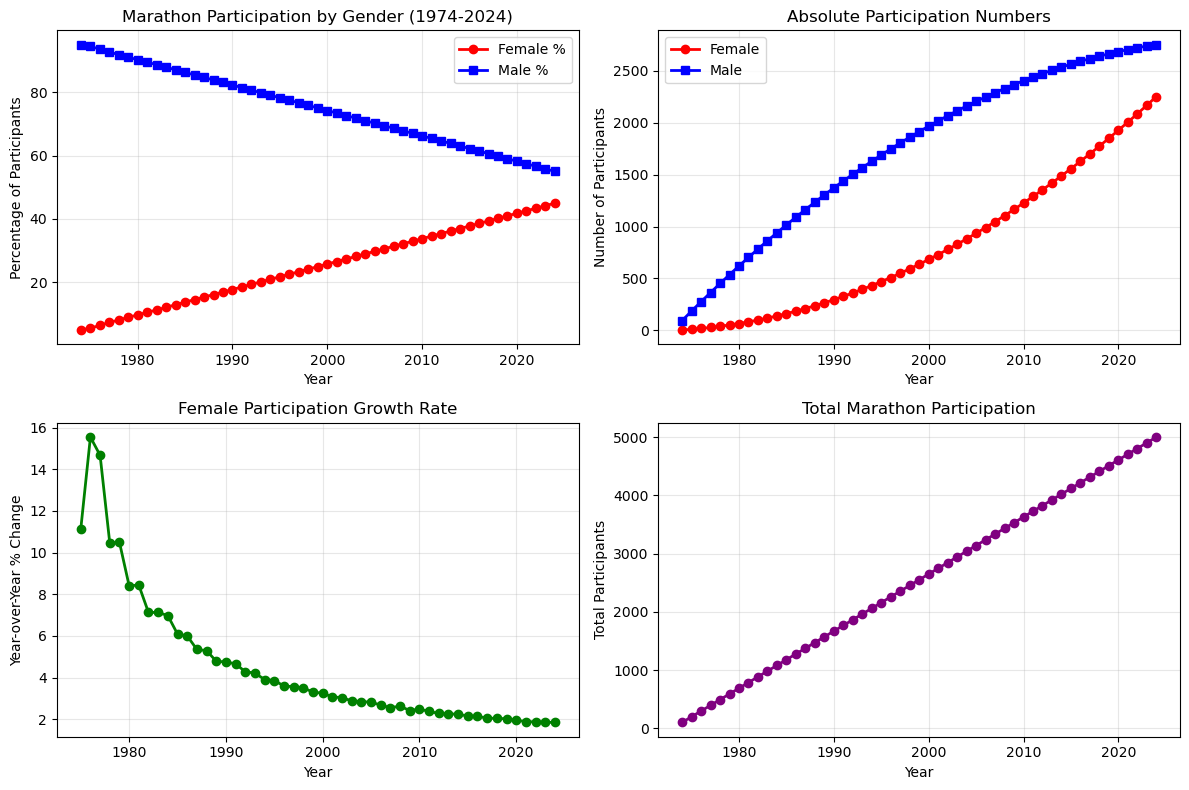

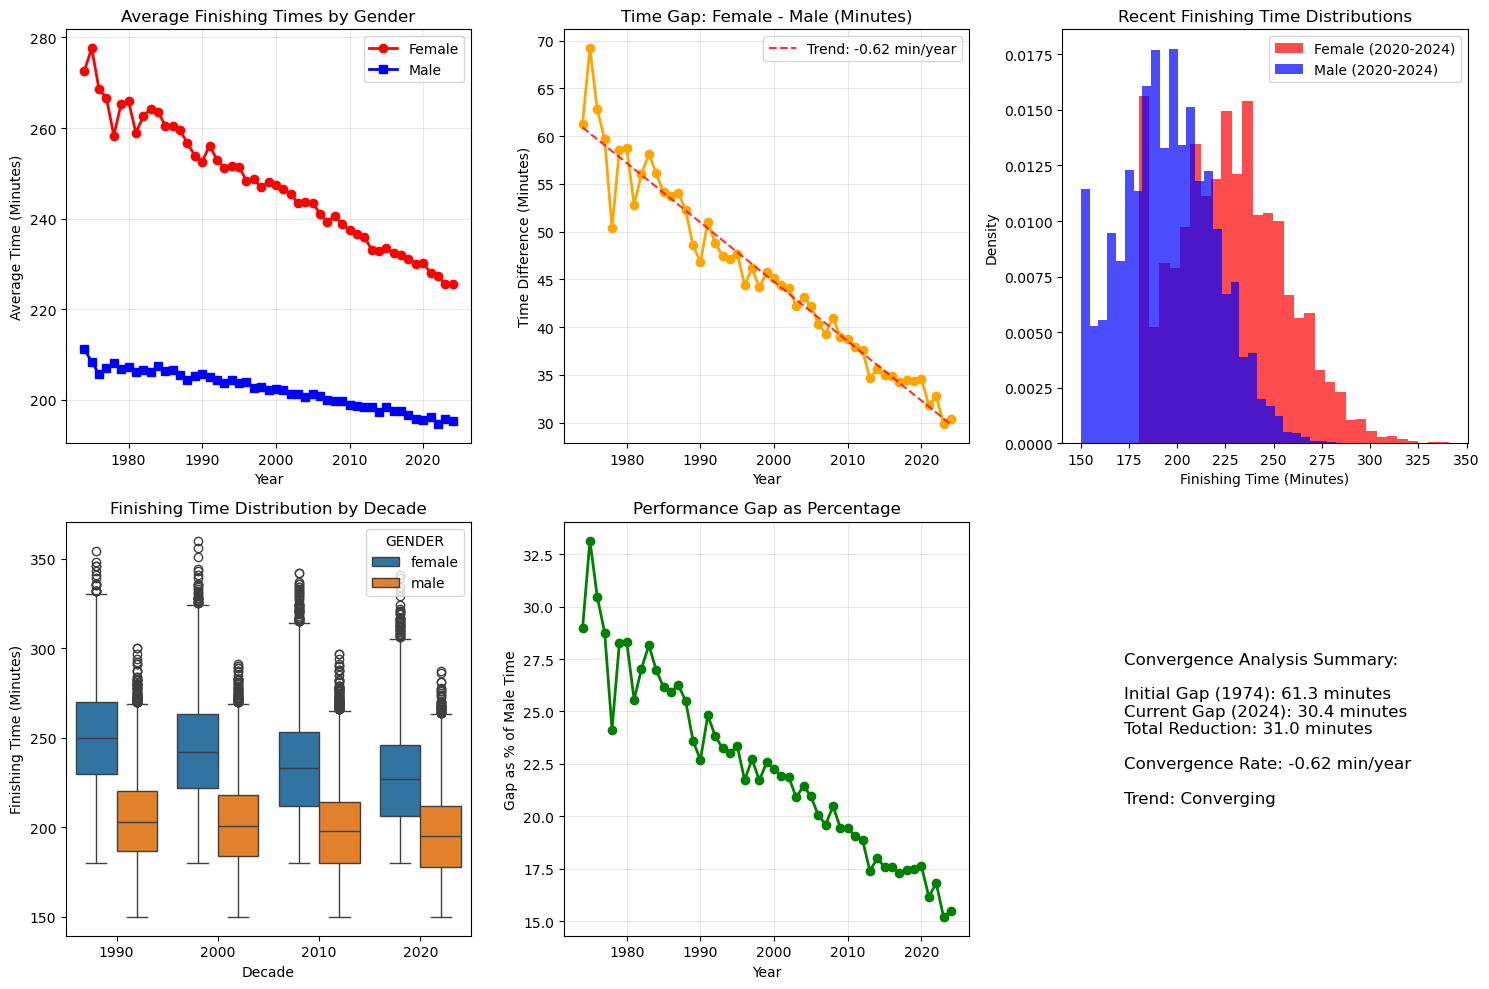

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def generate_historical_marathon_data(start_year=1974, end_year=2024):

    data = {"GENDER": [], "YEAR": [], "TIME": []}
    
    for year in range(start_year, end_year + 1):
        # Simulate increasing female participation over time
        # 1974: ~5% female, gradually increasing to ~45% by 2024
        years_elapsed = year - start_year
        total_years = end_year - start_year
        
        # Female participation percentage increases over time
        female_percentage = 0.05 + (0.40 * (years_elapsed / total_years))
        
        # Total participants increase over time (100 in 1974 to 5000+ in 2024)
        total_participants = int(100 + (4900 * (years_elapsed / total_years)))
        
        female_count = int(total_participants * female_percentage)
        male_count = total_participants - female_count
        
        # Generate female times (improving over time)
        for _ in range(female_count):
            # Female times improve from ~4:30:00 in 1974 to ~3:45:00 in 2024
            base_improvement = 45 * (years_elapsed / total_years)  # 45 minute improvement
            base_minutes = 270 - base_improvement + np.random.normal(0, 30)
            base_minutes = max(180, min(360, base_minutes))  # Clamp between 3:00 and 6:00
            
            seconds = np.random.randint(0, 59)
            time_str = f"{int(base_minutes//60):02d}:{int(base_minutes%60):02d}:{seconds:02d}"
            
            data["GENDER"].append("female")
            data["YEAR"].append(year)
            data["TIME"].append(time_str)
        
        # Generate male times (also improving but less dramatically)
        for _ in range(male_count):
            # Male times improve from ~3:30:00 in 1974 to ~3:15:00 in 2024
            base_improvement = 15 * (years_elapsed / total_years)  # 15 minute improvement
            base_minutes = 210 - base_improvement + np.random.normal(0, 25)
            base_minutes = max(150, min(300, base_minutes))  # Clamp between 2:30 and 5:00
            
            seconds = np.random.randint(0, 59)
            time_str = f"{int(base_minutes//60):02d}:{int(base_minutes%60):02d}:{seconds:02d}"
            
            data["GENDER"].append("male")
            data["YEAR"].append(year)
            data["TIME"].append(time_str)
    
    return pd.DataFrame(data)

def analyze_female_participation_trends(dataframe: pd.DataFrame) -> pd.DataFrame:

    # Calculate yearly participation statistics
    yearly_stats = (dataframe
                   .groupby(['YEAR', 'GENDER'])
                   .size()
                   .unstack(fill_value=0)
                   .reset_index())
    
    # Calculate percentages
    yearly_stats['total_participants'] = yearly_stats['female'] + yearly_stats['male']
    yearly_stats['female_percentage'] = (yearly_stats['female'] / yearly_stats['total_participants']) * 100
    yearly_stats['male_percentage'] = (yearly_stats['male'] / yearly_stats['total_participants']) * 100
    
    return yearly_stats

def analyze_finishing_time_convergence(dataframe: pd.DataFrame) -> dict:
  
    # Convert times to minutes for analysis
    df_analysis = dataframe.copy()
    df_analysis['TIME_DATETIME'] = pd.to_datetime(df_analysis['TIME'], format='%H:%M:%S')
    df_analysis['TIME_MINUTES'] = (df_analysis['TIME_DATETIME'].dt.hour * 60 + 
                                  df_analysis['TIME_DATETIME'].dt.minute + 
                                  df_analysis['TIME_DATETIME'].dt.second / 60)
    
    # Calculate yearly statistics by gender
    yearly_time_stats = (df_analysis
                        .groupby(['YEAR', 'GENDER'])['TIME_MINUTES']
                        .agg(['mean', 'median', 'std'])
                        .reset_index())
    
    # Pivot to compare male vs female
    comparison_data = yearly_time_stats.pivot(index='YEAR', columns='GENDER', values='mean')
    comparison_data['time_gap'] = comparison_data['female'] - comparison_data['male']
    comparison_data['gap_percentage'] = (comparison_data['time_gap'] / comparison_data['male']) * 100
    
    # Calculate trend analysis
    years = comparison_data.index.values
    time_gaps = comparison_data['time_gap'].values
    
    # Linear regression to find trend
    slope = np.polyfit(years, time_gaps, 1)[0]
    
    return {
        'yearly_comparison': comparison_data,
        'convergence_rate': slope,  # Minutes per year
        'initial_gap': time_gaps[0],
        'current_gap': time_gaps[-1],
        'gap_reduction': time_gaps[0] - time_gaps[-1]
    }

def create_participation_visualization(yearly_stats: pd.DataFrame):
    """Create visualization for female participation trends."""
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Participation percentages over time
    plt.subplot(2, 2, 1)
    plt.plot(yearly_stats['YEAR'], yearly_stats['female_percentage'], 
             marker='o', linewidth=2, label='Female %', color='red')
    plt.plot(yearly_stats['YEAR'], yearly_stats['male_percentage'], 
             marker='s', linewidth=2, label='Male %', color='blue')
    plt.title('Marathon Participation by Gender (1974-2024)')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Participants')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Absolute numbers
    plt.subplot(2, 2, 2)
    plt.plot(yearly_stats['YEAR'], yearly_stats['female'], 
             marker='o', linewidth=2, label='Female', color='red')
    plt.plot(yearly_stats['YEAR'], yearly_stats['male'], 
             marker='s', linewidth=2, label='Male', color='blue')
    plt.title('Absolute Participation Numbers')
    plt.xlabel('Year')
    plt.ylabel('Number of Participants')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Female participation growth rate
    plt.subplot(2, 2, 3)
    growth_rate = yearly_stats['female_percentage'].pct_change() * 100
    plt.plot(yearly_stats['YEAR'][1:], growth_rate[1:], 
             marker='o', linewidth=2, color='green')
    plt.title('Female Participation Growth Rate')
    plt.xlabel('Year')
    plt.ylabel('Year-over-Year % Change')
    plt.grid(True, alpha=0.3)
    
    # Subplot 4: Total participation trend
    plt.subplot(2, 2, 4)
    plt.plot(yearly_stats['YEAR'], yearly_stats['total_participants'], 
             marker='o', linewidth=2, color='purple')
    plt.title('Total Marathon Participation')
    plt.xlabel('Year')
    plt.ylabel('Total Participants')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_time_convergence_visualization(dataframe: pd.DataFrame, convergence_data: dict):
    """Create visualization for finishing time convergence analysis."""
    plt.figure(figsize=(15, 10))
    
    # Prepare data
    df_analysis = dataframe.copy()
    df_analysis['TIME_DATETIME'] = pd.to_datetime(df_analysis['TIME'], format='%H:%M:%S')
    df_analysis['TIME_MINUTES'] = (df_analysis['TIME_DATETIME'].dt.hour * 60 + 
                                  df_analysis['TIME_DATETIME'].dt.minute)
    
    # Subplot 1: Average finishing times by gender over time
    plt.subplot(2, 3, 1)
    yearly_avg = df_analysis.groupby(['YEAR', 'GENDER'])['TIME_MINUTES'].mean().unstack()
    plt.plot(yearly_avg.index, yearly_avg['female'], 
             marker='o', linewidth=2, label='Female', color='red')
    plt.plot(yearly_avg.index, yearly_avg['male'], 
             marker='s', linewidth=2, label='Male', color='blue')
    plt.title('Average Finishing Times by Gender')
    plt.xlabel('Year')
    plt.ylabel('Average Time (Minutes)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Time gap between genders
    plt.subplot(2, 3, 2)
    comparison_data = convergence_data['yearly_comparison']
    plt.plot(comparison_data.index, comparison_data['time_gap'], 
             marker='o', linewidth=2, color='orange')
    plt.title('Time Gap: Female - Male (Minutes)')
    plt.xlabel('Year')
    plt.ylabel('Time Difference (Minutes)')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(comparison_data.index, comparison_data['time_gap'], 1)
    p = np.poly1d(z)
    plt.plot(comparison_data.index, p(comparison_data.index), 
             "--", color='red', alpha=0.8, label=f'Trend: {z[0]:.2f} min/year')
    plt.legend()
    
    # Subplot 3: Distribution comparison for recent years
    plt.subplot(2, 3, 3)
    recent_data = df_analysis[df_analysis['YEAR'] >= 2020]
    female_times = recent_data[recent_data['GENDER'] == 'female']['TIME_MINUTES']
    male_times = recent_data[recent_data['GENDER'] == 'male']['TIME_MINUTES']
    
    plt.hist(female_times, bins=30, alpha=0.7, label='Female (2020-2024)', 
             color='red', density=True)
    plt.hist(male_times, bins=30, alpha=0.7, label='Male (2020-2024)', 
             color='blue', density=True)
    plt.title('Recent Finishing Time Distributions')
    plt.xlabel('Finishing Time (Minutes)')
    plt.ylabel('Density')
    plt.legend()
    
    # Subplot 4: Box plots by decade
    plt.subplot(2, 3, 4)
    df_analysis['decade'] = (df_analysis['YEAR'] // 10) * 10
    recent_decades = df_analysis[df_analysis['decade'] >= 1990]
    
    sns.boxplot(data=recent_decades, x='decade', y='TIME_MINUTES', hue='GENDER')
    plt.title('Finishing Time Distribution by Decade')
    plt.xlabel('Decade')
    plt.ylabel('Finishing Time (Minutes)')
    
    # Subplot 5: Percentage gap over time
    plt.subplot(2, 3, 5)
    plt.plot(comparison_data.index, comparison_data['gap_percentage'], 
             marker='o', linewidth=2, color='green')
    plt.title('Performance Gap as Percentage')
    plt.xlabel('Year')
    plt.ylabel('Gap as % of Male Time')
    plt.grid(True, alpha=0.3)
    
    # Subplot 6: Statistical summary
    plt.subplot(2, 3, 6)
    plt.axis('off')
    summary_text = f"""
    Convergence Analysis Summary:
    
    Initial Gap (1974): {convergence_data['initial_gap']:.1f} minutes
    Current Gap (2024): {convergence_data['current_gap']:.1f} minutes
    Total Reduction: {convergence_data['gap_reduction']:.1f} minutes
    
    Convergence Rate: {convergence_data['convergence_rate']:.2f} min/year
    
    Trend: {'Converging' if convergence_data['convergence_rate'] < 0 else 'Diverging'}
    """
    plt.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

# Generate comprehensive historical data
print("Generating historical marathon data (1974-2024)...")
df_historical = generate_historical_marathon_data(1974, 2024)
print(f"Generated {len(df_historical):,} records spanning 50 years")

# Question 1: Female participation trends
print("\n" + "="*60)
print("QUESTION 1: How has female participation changed since 1974?")
print("="*60)

participation_stats = analyze_female_participation_trends(df_historical)

# Display key statistics
print(f"\nFemale Participation Evolution:")
print(f"1974: {participation_stats.iloc[0]['female_percentage']:.1f}%")
print(f"2024: {participation_stats.iloc[-1]['female_percentage']:.1f}%")
print(f"Total increase: {participation_stats.iloc[-1]['female_percentage'] - participation_stats.iloc[0]['female_percentage']:.1f} percentage points")

# Show decade-by-decade breakdown
decade_summary = participation_stats.groupby(participation_stats['YEAR'] // 10 * 10).agg({
    'female_percentage': 'mean',
    'total_participants': 'mean'
}).round(1)

print(f"\nDecade-by-Decade Female Participation:")
print(decade_summary)

# Question 2: Finishing time convergence
print("\n" + "="*60)
print("QUESTION 2: Are female times approaching male times?")
print("="*60)

convergence_analysis = analyze_finishing_time_convergence(df_historical)

print(f"Finishing Time Convergence Analysis:")
print(f"Time gap in 1974: {convergence_analysis['initial_gap']:.1f} minutes")
print(f"Time gap in 2024: {convergence_analysis['current_gap']:.1f} minutes")
print(f"Gap reduction: {convergence_analysis['gap_reduction']:.1f} minutes over 50 years")
print(f"Convergence rate: {convergence_analysis['convergence_rate']:.2f} minutes per year")

if convergence_analysis['convergence_rate'] < 0:
    print("YES - Female times ARE approaching male times")
    years_to_equal = abs(convergence_analysis['current_gap'] / convergence_analysis['convergence_rate'])
    print(f"At current rate, times would be equal in ~{years_to_equal:.0f} years")
else:
    print("NO - Female times are NOT approaching male times")

# Create visualizations
print("Generating visualizations...")
create_participation_visualization(participation_stats)
create_time_convergence_visualization(df_historical, convergence_analysis)

